In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, PowerTransformer

# Load the dataset
df = sns.load_dataset("tips")

# Check for null values
print("Null Values:\n", df.isnull().sum())

# Detect outliers using IQR method for 'total_bill' and 'tip'
Q1 = df[['total_bill', 'tip']].quantile(0.25)
Q3 = df[['total_bill', 'tip']].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[['total_bill', 'tip']] < (Q1 - 1.5 * IQR)) | (df[['total_bill', 'tip']] > (Q3 + 1.5 * IQR)))
print("\nOutliers Detected:\n", outliers.any())

# Remove outliers
df = df[~((df[['total_bill', 'tip']] < (Q1 - 1.5 * IQR)) | (df[['total_bill', 'tip']] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Feature transformation (Log transform total_bill)
df['log_total_bill'] = PowerTransformer().fit_transform(df[['total_bill']])

# Feature scaling (MinMax scaling of tip)
scaler = MinMaxScaler()
df['scaled_tip'] = scaler.fit_transform(df[['tip']])

Null Values:
 total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

Outliers Detected:
 total_bill    True
tip           True
dtype: bool


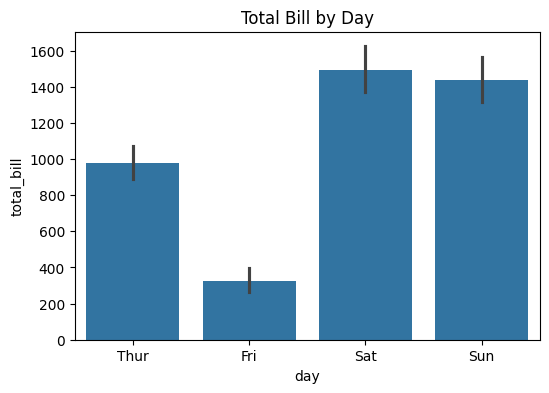

In [2]:
# 1. Bar plot: Day vs Total bill
plt.figure(figsize=(6,4))
sns.barplot(x='day', y='total_bill', data=df, estimator=sum)
plt.title('Total Bill by Day')
plt.show()

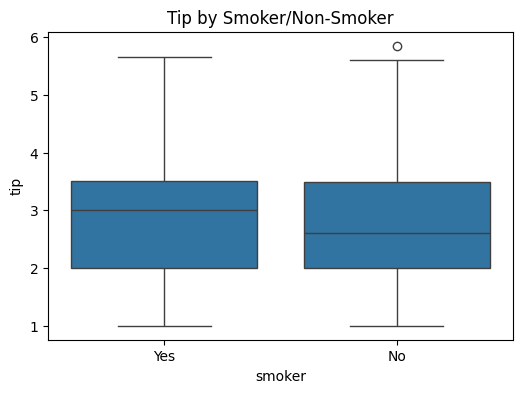

In [5]:
# 2. Box plot: Smoker vs Tip
plt.figure(figsize=(6,4))
sns.boxplot(x='smoker', y='tip', data=df)
plt.title('Tip by Smoker/Non-Smoker')
plt.show()

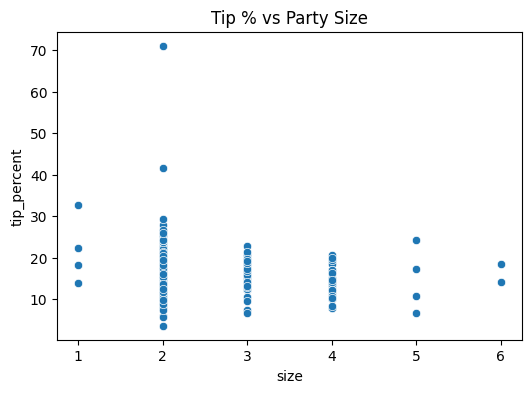

In [6]:
# 3. Scatter plot: Tip% vs Size
df['tip_percent'] = (df['tip'] / df['total_bill']) * 100
plt.figure(figsize=(6,4))
sns.scatterplot(x='size', y='tip_percent', data=df)
plt.title('Tip % vs Party Size')
plt.show()

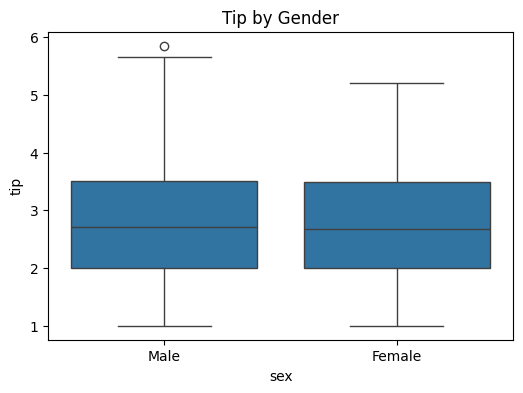

In [7]:
# 4. Box plot: Gender vs Tip
plt.figure(figsize=(6,4))
sns.boxplot(x='sex', y='tip', data=df)
plt.title('Tip by Gender')
plt.show()

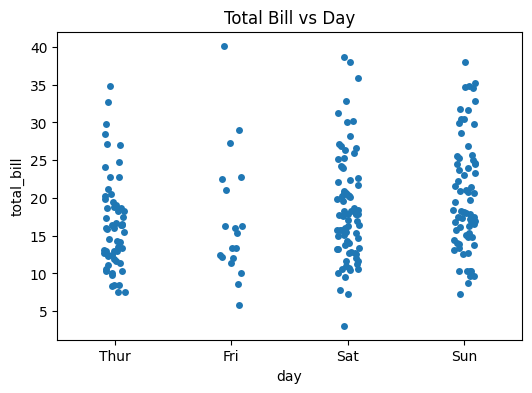

In [8]:
# 5. Scatter plot: Total Bill vs Day
plt.figure(figsize=(6,4))
sns.stripplot(x='day', y='total_bill', data=df, jitter=True)
plt.title('Total Bill vs Day')
plt.show()

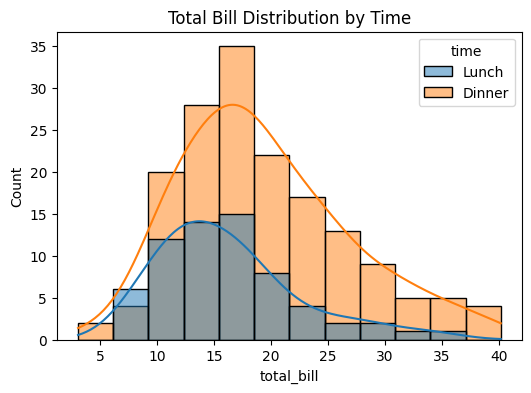

In [9]:
# 6. Hist plot: Total bill by time
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='total_bill', hue='time', kde=True)
plt.title('Total Bill Distribution by Time')
plt.show()

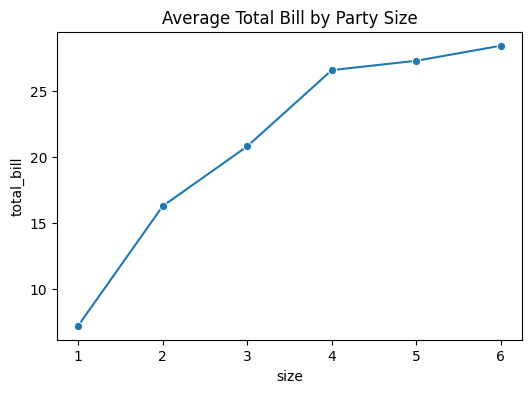

In [10]:
# 7. Line plot: Avg total bill by size
plt.figure(figsize=(6,4))
avg_bill = df.groupby('size')['total_bill'].mean().reset_index()
sns.lineplot(x='size', y='total_bill', data=avg_bill, marker='o')
plt.title('Average Total Bill by Party Size')
plt.show()

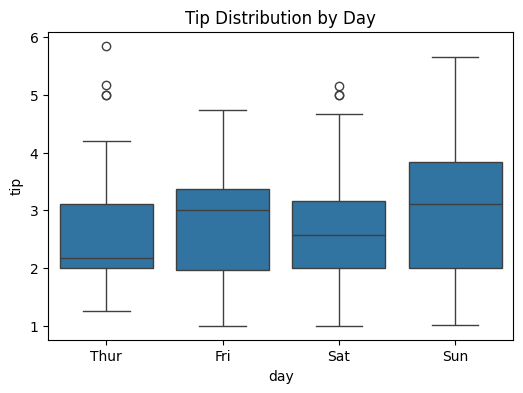

In [11]:
# 8. Box plot: Tip by day
plt.figure(figsize=(6,4))
sns.boxplot(x='day', y='tip', data=df)
plt.title('Tip Distribution by Day')
plt.show()

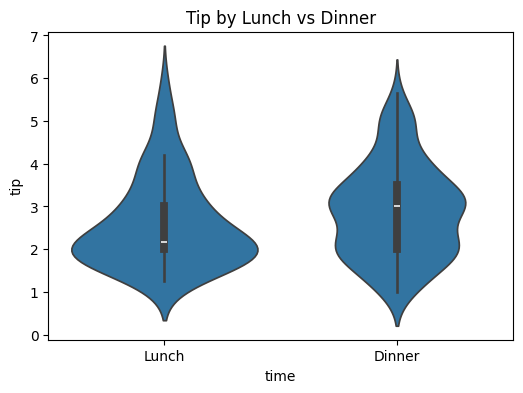

In [12]:
# 9. Violin plot: Tip by time
plt.figure(figsize=(6,4))
sns.violinplot(x='time', y='tip', data=df)
plt.title('Tip by Lunch vs Dinner')
plt.show()

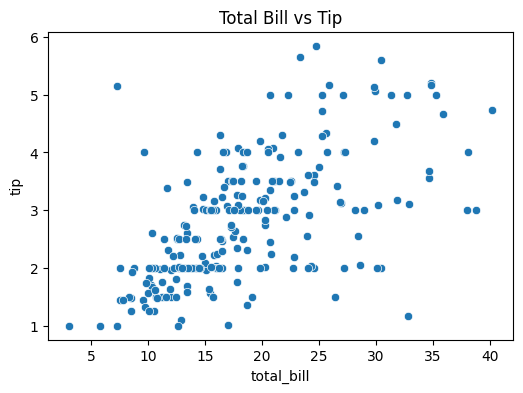

In [13]:
# 10. Scatter plot: Tip vs Total bill
plt.figure(figsize=(6,4))
sns.scatterplot(x='total_bill', y='tip', data=df)
plt.title('Total Bill vs Tip')
plt.show()